# Sony Analytics Predictive Model

## Load in Required Packages

In [1]:
# Load in required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install mysql-connector-python
import mysql.connector

import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image
import graphviz
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from tabulate import tabulate

!pip install six
from six import StringIO

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import OrdinalEncoder

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 15.1 MB/s eta 0:00:00


In [2]:
host = 'bsan-6080-sony-pictures.cricisci23ba.us-east-1.rds.amazonaws.com'
database = 'sony_db'
user = 'admin'
password = 'bsan6080'

# Establish a connection to the MySQL server
try:
    connection = mysql.connector.connect(
        host=host,
        database=database,
        user=user,
        password=password
    )

    # Check if connection is established
    if connection.is_connected():
        print("Connected to MySQL server")

        # Define and execute the SELECT query
        query = "SELECT * FROM full_table"
        imdb = pd.read_sql(query, connection)

        # Print DataFrame
        imdb.info()

        # Close connection
        connection.close()

    else:
        print("Failed to connect to MySQL server")
except mysql.connector.Error as e:
    print("Error connecting to MySQL server:", e)


Connected to MySQL server


<ipython-input-2-2a82f6062f67>:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  imdb = pd.read_sql(query, connection)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12488 entries, 0 to 12487
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     12488 non-null  int64  
 1   title                  12488 non-null  object 
 2   vote_average           12488 non-null  float64
 3   vote_count             12488 non-null  int64  
 4   release_date           12488 non-null  object 
 5   revenue                12488 non-null  int64  
 6   categorized revenue2   12488 non-null  object 
 7   runtime                12488 non-null  int64  
 8   budget                 12488 non-null  int64  
 9   original_language      12488 non-null  object 
 10  popularity             12488 non-null  float64
 11  genre                  12488 non-null  object 
 12  production_companies2  11863 non-null  object 
 13  production_country     12488 non-null  object 
dtypes: float64(2), int64(5), object(7)
memory usage: 1.3+ 

## Data Cleaning

There is no longer a need to load in the dataset, we've connected the server to the python code.

In [3]:
# Load in the Dataset
# imdb = pd.read_csv("TMDB_movie_data.csv")

In [4]:
# Get information on the dataset
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12488 entries, 0 to 12487
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     12488 non-null  int64  
 1   title                  12488 non-null  object 
 2   vote_average           12488 non-null  float64
 3   vote_count             12488 non-null  int64  
 4   release_date           12488 non-null  object 
 5   revenue                12488 non-null  int64  
 6   categorized revenue2   12488 non-null  object 
 7   runtime                12488 non-null  int64  
 8   budget                 12488 non-null  int64  
 9   original_language      12488 non-null  object 
 10  popularity             12488 non-null  float64
 11  genre                  12488 non-null  object 
 12  production_companies2  11863 non-null  object 
 13  production_country     12488 non-null  object 
dtypes: float64(2), int64(5), object(7)
memory usage: 1.3+ 

In [5]:
# Check for Na's
imdb.isnull().sum()

id                         0
title                      0
vote_average               0
vote_count                 0
release_date               0
revenue                    0
categorized revenue2       0
runtime                    0
budget                     0
original_language          0
popularity                 0
genre                      0
production_companies2    625
production_country         0
dtype: int64

In [6]:
# Check proportion of the rows with missing values
imdb.isna().sum() / len(imdb)

id                       0.000000
title                    0.000000
vote_average             0.000000
vote_count               0.000000
release_date             0.000000
revenue                  0.000000
categorized revenue2     0.000000
runtime                  0.000000
budget                   0.000000
original_language        0.000000
popularity               0.000000
genre                    0.000000
production_companies2    0.050048
production_country       0.000000
dtype: float64

It is only about 5% of the rows. We can remove these.

In [7]:
# Remove the rows with the missing values
imdb = imdb.dropna()
# Check that the rows with NA's were removed
imdb.isnull().sum()

id                       0
title                    0
vote_average             0
vote_count               0
release_date             0
revenue                  0
categorized revenue2     0
runtime                  0
budget                   0
original_language        0
popularity               0
genre                    0
production_companies2    0
production_country       0
dtype: int64

In [8]:
# Check for duplicate rows
imdb.duplicated().sum()

0

In [9]:
imdb.head()

,id,title,vote_average,vote_count,release_date,revenue,categorized revenue2,runtime,budget,original_language,popularity,genre,production_companies2,production_country
0,723889,Witness to a Rape,2.000,1,2020-07-10,100000,Medium,80,100000,ar,0.686,Documentary,Zoom in Focus Productions,Egypt
2,447553,Restricted Area Baron Palace,10.000,1,2016-11-16,400000,Medium,85,250000,ar,0.600,Thriller,digital eye art production,Egypt
3,27205,Inception,8.364,34495,2010-07-15,825532764,Very High,148,160000000,en,83.952,Action,Legendary Pictures,United Kingdom
4,157336,Interstellar,8.417,32571,2014-11-05,701729206,Very High,169,165000000,en,140.241,Adventure,Legendary Pictures,United Kingdom
5,155,The Dark Knight,8.512,30619,2008-07-16,1004558444,Very High,152,185000000,en,130.643,Drama,DC Comics,United Kingdom


In [10]:
# We need to convert some of the column types to match what they should be
col_to_convert = ['title','categorized revenue2','original_language',
                  'genre','production_companies2','production_country']
imdb[col_to_convert] = imdb[col_to_convert].astype(str)

# Check that it worked
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11863 entries, 0 to 12487
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     11863 non-null  int64  
 1   title                  11863 non-null  object 
 2   vote_average           11863 non-null  float64
 3   vote_count             11863 non-null  int64  
 4   release_date           11863 non-null  object 
 5   revenue                11863 non-null  int64  
 6   categorized revenue2   11863 non-null  object 
 7   runtime                11863 non-null  int64  
 8   budget                 11863 non-null  int64  
 9   original_language      11863 non-null  object 
 10  popularity             11863 non-null  float64
 11  genre                  11863 non-null  object 
 12  production_companies2  11863 non-null  object 
 13  production_country     11863 non-null  object 
dtypes: float64(2), int64(5), object(7)
memory usage: 1.6+ MB


In [11]:
# Convert the release_date column to date type
imdb['release_date'] = pd.to_datetime(imdb['release_date'])

In [12]:
# Let's rename some columns to be better formatted
# Renaming multiple columns
imdb.rename(columns={'categorized revenue2': 'categorized_rev',
                     'production_companies2': 'production_companies'}, inplace=True)

# Check that it worked
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11863 entries, 0 to 12487
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    11863 non-null  int64         
 1   title                 11863 non-null  object        
 2   vote_average          11863 non-null  float64       
 3   vote_count            11863 non-null  int64         
 4   release_date          11863 non-null  datetime64[ns]
 5   revenue               11863 non-null  int64         
 6   categorized_rev       11863 non-null  object        
 7   runtime               11863 non-null  int64         
 8   budget                11863 non-null  int64         
 9   original_language     11863 non-null  object        
 10  popularity            11863 non-null  float64       
 11  genre                 11863 non-null  object        
 12  production_companies  11863 non-null  object        
 13  production_country   

In [13]:
# Get dimensions of the data
imdb.shape

(11863, 14)

In [14]:
# Look at the first few rows of the data
imdb.head()

,id,title,vote_average,vote_count,release_date,revenue,categorized_rev,runtime,budget,original_language,popularity,genre,production_companies,production_country
0,723889,Witness to a Rape,2.000,1,2020-07-10,100000,Medium,80,100000,ar,0.686,Documentary,Zoom in Focus Productions,Egypt
2,447553,Restricted Area Baron Palace,10.000,1,2016-11-16,400000,Medium,85,250000,ar,0.600,Thriller,digital eye art production,Egypt
3,27205,Inception,8.364,34495,2010-07-15,825532764,Very High,148,160000000,en,83.952,Action,Legendary Pictures,United Kingdom
4,157336,Interstellar,8.417,32571,2014-11-05,701729206,Very High,169,165000000,en,140.241,Adventure,Legendary Pictures,United Kingdom
5,155,The Dark Knight,8.512,30619,2008-07-16,1004558444,Very High,152,185000000,en,130.643,Drama,DC Comics,United Kingdom


In [15]:
# Basic descriptive statistics of each column
round(imdb.describe(),2)

,id,vote_average,vote_count,release_date,revenue,runtime,budget,popularity
count,11863.00,11863.00,11863.00,11863,1.186300e+04,11863.00,1.186300e+04,11863.00
mean,197856.89,6.09,1275.28,2002-06-07 20:45:25.111691904,5.326241e+07,101.52,1.792094e+07,17.03
min,5.00,0.00,0.00,1930-03-09 00:00:00,1.000000e+00,1.00,0.000000e+00,0.00
25%,11848.00,5.68,40.00,1993-11-19 00:00:00,6.152135e+05,91.00,0.000000e+00,5.03
50%,44129.00,6.30,258.00,2007-04-12 00:00:00,6.800000e+06,101.00,3.000000e+06,11.60
75%,321435.00,6.92,1125.50,2015-07-03 00:00:00,3.902779e+07,114.00,2.000000e+07,18.54
max,1265226.00,10.00,34495.00,2029-10-12 00:00:00,2.923706e+09,960.00,4.600000e+08,2994.36
std,280634.26,1.64,2783.34,NaN,1.428965e+08,28.73,3.495943e+07,55.56


In [16]:
# Remove the columns that are not needed
imdb = imdb.drop(['vote_average','popularity'], axis=1)

## Data Exploration

In [17]:
# Quick check on info on the dataframe to see where we're at
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11863 entries, 0 to 12487
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    11863 non-null  int64         
 1   title                 11863 non-null  object        
 2   vote_count            11863 non-null  int64         
 3   release_date          11863 non-null  datetime64[ns]
 4   revenue               11863 non-null  int64         
 5   categorized_rev       11863 non-null  object        
 6   runtime               11863 non-null  int64         
 7   budget                11863 non-null  int64         
 8   original_language     11863 non-null  object        
 9   genre                 11863 non-null  object        
 10  production_companies  11863 non-null  object        
 11  production_country    11863 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 1.4+ MB


In [18]:
# Create a new column that tracks the month of the release date
imdb['release_month'] = imdb['release_date'].dt.month
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11863 entries, 0 to 12487
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    11863 non-null  int64         
 1   title                 11863 non-null  object        
 2   vote_count            11863 non-null  int64         
 3   release_date          11863 non-null  datetime64[ns]
 4   revenue               11863 non-null  int64         
 5   categorized_rev       11863 non-null  object        
 6   runtime               11863 non-null  int64         
 7   budget                11863 non-null  int64         
 8   original_language     11863 non-null  object        
 9   genre                 11863 non-null  object        
 10  production_companies  11863 non-null  object        
 11  production_country    11863 non-null  object        
 12  release_month         11863 non-null  int32         
dtypes: datetime64[ns](1),

In [19]:
# Check the number of production companies
imdb.production_companies.nunique()

5403

This number is way too high to do analysis on. The model would be extremely complicated, take forever to train and run. It might be a good idea to split the companies into bins based on total revenue earned.

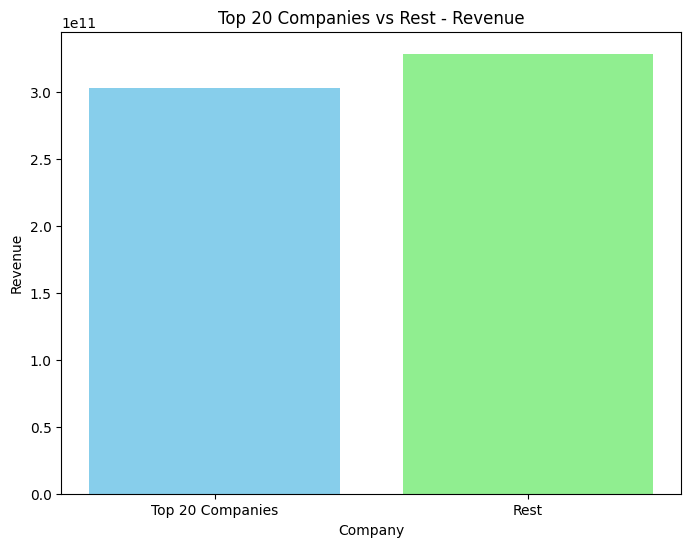

In [20]:
# Group by production companies and sum the revenue
company_revenue = imdb.groupby('production_companies')['revenue'].sum()

# Sort the results in descending order
sorted_companies = company_revenue.sort_values(ascending=False)

# Get the top 20 companies
top_20_companies = sorted_companies.head(20)

# Calculate total revenue from the top 20 companies
top_20_revenue = top_20_companies.sum()

# Calculate total revenue from all companies excluding the top 20
rest_revenue = sorted_companies[~sorted_companies.index.isin(top_20_companies.index)].sum()

# Create a DataFrame for visualization
data = pd.DataFrame({'Company': ['Top 20 Companies', 'Rest'],
                     'Revenue': [top_20_revenue, rest_revenue]})

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(data['Company'], data['Revenue'], color=['skyblue', 'lightgreen'])
plt.title('Top 20 Companies vs Rest - Revenue')
plt.xlabel('Company')
plt.ylabel('Revenue')
plt.show()


The top 20 production companies make up nearly half of the total revenue from the data. Let's split the production_companies into two values.

In [21]:
# Create the new column
imdb['top20_production_company'] = imdb['production_companies'].isin(top_20_companies)

imdb.head()

,id,title,vote_count,release_date,revenue,categorized_rev,runtime,budget,original_language,genre,production_companies,production_country,release_month,top20_production_company
0,723889,Witness to a Rape,1,2020-07-10,100000,Medium,80,100000,ar,Documentary,Zoom in Focus Productions,Egypt,7,False
2,447553,Restricted Area Baron Palace,1,2016-11-16,400000,Medium,85,250000,ar,Thriller,digital eye art production,Egypt,11,False
3,27205,Inception,34495,2010-07-15,825532764,Very High,148,160000000,en,Action,Legendary Pictures,United Kingdom,7,False
4,157336,Interstellar,32571,2014-11-05,701729206,Very High,169,165000000,en,Adventure,Legendary Pictures,United Kingdom,11,False
5,155,The Dark Knight,30619,2008-07-16,1004558444,Very High,152,185000000,en,Drama,DC Comics,United Kingdom,7,False


In [22]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11863 entries, 0 to 12487
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        11863 non-null  int64         
 1   title                     11863 non-null  object        
 2   vote_count                11863 non-null  int64         
 3   release_date              11863 non-null  datetime64[ns]
 4   revenue                   11863 non-null  int64         
 5   categorized_rev           11863 non-null  object        
 6   runtime                   11863 non-null  int64         
 7   budget                    11863 non-null  int64         
 8   original_language         11863 non-null  object        
 9   genre                     11863 non-null  object        
 10  production_companies      11863 non-null  object        
 11  production_country        11863 non-null  object        
 12  release_month          

In [23]:
# Remove the columns that are not needed
imdb = imdb.drop(['id','title','release_date','revenue','production_companies'], axis=1)
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11863 entries, 0 to 12487
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   vote_count                11863 non-null  int64 
 1   categorized_rev           11863 non-null  object
 2   runtime                   11863 non-null  int64 
 3   budget                    11863 non-null  int64 
 4   original_language         11863 non-null  object
 5   genre                     11863 non-null  object
 6   production_country        11863 non-null  object
 7   release_month             11863 non-null  int32 
 8   top20_production_company  11863 non-null  bool  
dtypes: bool(1), int32(1), int64(3), object(4)
memory usage: 1.0+ MB


## Encoding

In [24]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11863 entries, 0 to 12487
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   vote_count                11863 non-null  int64 
 1   categorized_rev           11863 non-null  object
 2   runtime                   11863 non-null  int64 
 3   budget                    11863 non-null  int64 
 4   original_language         11863 non-null  object
 5   genre                     11863 non-null  object
 6   production_country        11863 non-null  object
 7   release_month             11863 non-null  int32 
 8   top20_production_company  11863 non-null  bool  
dtypes: bool(1), int32(1), int64(3), object(4)
memory usage: 1.0+ MB


In [25]:
#Ordinally encode the target variable (categorized revenue)
# Extract the target variable
target_variable = imdb[['categorized_rev']]

# Initialize the OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the target variable
encoded_target = encoder.fit_transform(target_variable)

# Replace the original 'categorized_revenue' column with the encoded values
imdb['categorized_rev'] = encoded_target

# Convert the new categorized_rev column into integer
imdb['categorized_rev'] = imdb['categorized_rev'].astype(int)

# Confirm the changes were made
imdb.head()

,vote_count,categorized_rev,runtime,budget,original_language,genre,production_country,release_month,top20_production_company
0,1,2,80,100000,ar,Documentary,Egypt,7,False
2,1,2,85,250000,ar,Thriller,Egypt,11,False
3,34495,3,148,160000000,en,Action,United Kingdom,7,False
4,32571,3,169,165000000,en,Adventure,United Kingdom,11,False
5,30619,3,152,185000000,en,Drama,United Kingdom,7,False


In [26]:
# One-Hot Encoding the categorical variables
# Select the columns to encode
columns_to_encode = ['original_language','genre','production_country']

# Encode the variables
imdb_encoded = pd.get_dummies(imdb, columns = columns_to_encode, drop_first = True)

In [27]:
# Check that the encoding worked
imdb_encoded.head()

,vote_count,categorized_rev,runtime,budget,release_month,top20_production_company,original_language_am,original_language_ar,original_language_be,original_language_bg,...,production_country_Uganda,production_country_Ukraine,production_country_United Arab Emirates,production_country_United Kingdom,production_country_United States of America,production_country_Uruguay,production_country_Uzbekistan,production_country_Venezuela,production_country_Vietnam,production_country_Yemen
0,1,2,80,100000,7,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,2,85,250000,11,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,34495,3,148,160000000,7,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,32571,3,169,165000000,11,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
5,30619,3,152,185000000,7,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [28]:
# Check for missing values
imdb.isnull().sum()

vote_count                  0
categorized_rev             0
runtime                     0
budget                      0
original_language           0
genre                       0
production_country          0
release_month               0
top20_production_company    0
dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Split the data into features (X) and target variable (y)
X = imdb_encoded.drop(columns=['categorized_rev'])
y = imdb_encoded['categorized_rev']

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9490 entries, 9084 to 7579
Columns: 205 entries, vote_count to production_country_Yemen
dtypes: bool(201), int32(1), int64(3)
memory usage: 2.1 MB


In [32]:
# Create a decision tree classifier
tree_model = DecisionTreeClassifier(random_state=42)

# Train the decision tree classifier
tree_model.fit(X_train, y_train)

# Evaluate the decision tree model
train_accuracy = tree_model.score(X_train, y_train)
test_accuracy = tree_model.score(X_test, y_test)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9998946259220232
Testing Accuracy: 0.5705857564264644


In [33]:
# Testing the data with the created tree
tree_model.fit(X_train,y_train)
y_pred = tree_model.predict(X_test)

In [34]:
# Accuracy Score
print(accuracy_score(y_test,y_pred))

0.5705857564264644


In [35]:
# Confusion Matrix
data_cm = confusion_matrix(y_test, y_pred)
print(data_cm)

[[333  23 215 162]
 [ 31 158  69   3]
 [208  74 299  45]
 [150   3  36 564]]


In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.46      0.45      0.46       733
           1       0.61      0.61      0.61       261
           2       0.48      0.48      0.48       626
           3       0.73      0.75      0.74       753

    accuracy                           0.57      2373
   macro avg       0.57      0.57      0.57      2373
weighted avg       0.57      0.57      0.57      2373



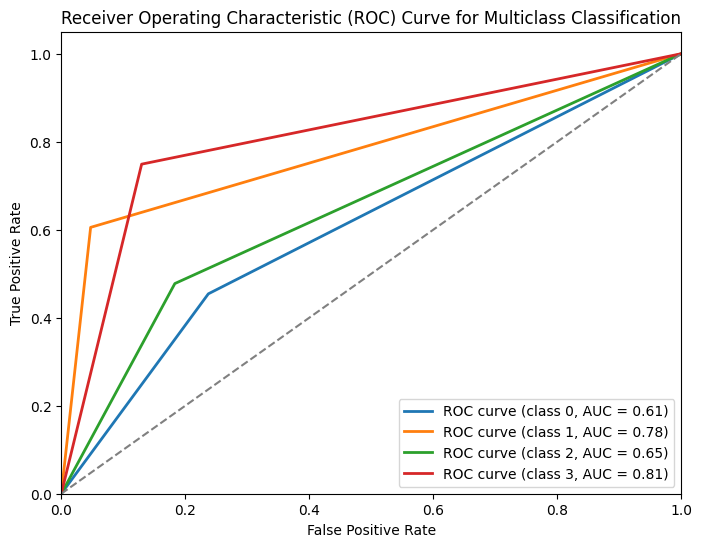

In [37]:
# Calculate ROC curve and AUC score for each class
n_classes = len(tree_model.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    y_test_binary = (y_test == i)  # Create binary target for the current class
    y_prob_class = tree_model.predict_proba(X_test)[:, i]  # Predict probabilities for the current class
    fpr[i], tpr[i], _ = roc_curve(y_test_binary, y_prob_class)
    roc_auc[i] = roc_auc_score(y_test_binary, y_prob_class)

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (class %d, AUC = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.show()